# Libraries

In [1]:
# Basics
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from pathlib import Path
import os
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime  
from datetime import timedelta 
from scipy import stats

In [2]:
# Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, GRU, Embedding, LSTM
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow.keras.backend import square, mean

In [3]:
# K means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
# Misc
from sklearn import preprocessing, metrics
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

# Load Data

In [5]:
# Datapath AAPL
os.chdir('C:\\Users\\asus\\Documents\\Python Projects\\Trading - Research and Backtest\\AAPL')
datapath = os.getcwd() + '\\Databases\\'
files = []
for (dirpath, dirnames, filenames) in os.walk(datapath):
    files.extend(filenames)
    break
print(files, '\n')
df_aapl = pd.read_csv(datapath+'AAPL-1d.csv', parse_dates=True, index_col='Date')
print(tabulate(df_aapl.head(), headers='keys'))

['AAPL-15min.csv', 'AAPL-1d.csv', 'AAPL-1min.csv', 'AAPL-1mo.csv', 'AAPL-1wk.csv', 'AAPL-2min.csv', 'AAPL-30min.csv', 'AAPL-3mo.csv', 'AAPL-5d.csv', 'AAPL-5min.csv', 'AAPL-60min.csv', 'AAPL-90min.csv', 'Extract_Indicator-Results.csv', 'welele', 'WilliamR-Results.csv'] 

Date                   Open    High    Low    Close    Adj Close       Volume    Dividends    Stock Splits
-------------------  ------  ------  -----  -------  -----------  -----------  -----------  --------------
1980-12-12 00:00:00    0.51    0.52   0.51     0.51         0.4   1.17258e+08            0               0
1980-12-15 00:00:00    0.49    0.49   0.49     0.49         0.38  4.39712e+07            0               0
1980-12-16 00:00:00    0.45    0.45   0.45     0.45         0.36  2.6432e+07             0               0
1980-12-17 00:00:00    0.46    0.46   0.46     0.46         0.36  2.16104e+07            0               0
1980-12-18 00:00:00    0.48    0.48   0.48     0.48         0.38  1.83624e+07          

In [6]:
# Datapath SPY
os.chdir('C:\\Users\\asus\\Documents\\Python Projects\\Trading - Research and Backtest\\SPY')
datapath = os.getcwd() + '\\Databases\\'
files = []
for (dirpath, dirnames, filenames) in os.walk(datapath):
    files.extend(filenames)
    break
print(files, '\n')
df_spy = pd.read_csv(datapath+'SPY-1d.csv', parse_dates=True, index_col='Date')
print(tabulate(df_spy.head(), headers='keys'))

['SPY-15min.csv', 'SPY-1d.csv', 'SPY-1min.csv', 'SPY-1mo.csv', 'SPY-1wk.csv', 'SPY-2min.csv', 'SPY-30min.csv', 'SPY-3mo.csv', 'SPY-5d.csv', 'SPY-5min.csv', 'SPY-60min.csv', 'SPY-90min.csv'] 

Date                   Open    High    Low    Close    Adj Close           Volume    Dividends    Stock Splits
-------------------  ------  ------  -----  -------  -----------  ---------------  -----------  --------------
1993-01-29 00:00:00   43.97   43.97  43.75    43.94        26.18       1.0032e+06            0               0
1993-02-01 00:00:00   43.97   44.25  43.97    44.25        26.37  480500                     0               0
1993-02-02 00:00:00   44.22   44.38  44.12    44.34        26.43  201300                     0               0
1993-02-03 00:00:00   44.41   44.84  44.38    44.81        26.71  529400                     0               0
1993-02-04 00:00:00   44.97   45.09  44.47    45           26.82  531500                     0               0


In [7]:
# Merge Data
df = pd.merge(df_aapl.loc['2018-01-01':'2020-08-23'].drop(columns=['Close', 'Dividends', 'Stock Splits']),
                    df_spy.loc['2018-01-01':'2020-08-23'].drop(columns=['Close', 'Dividends', 'Stock Splits']),
                    left_index=True, right_index=True
                    )
df.rename(columns={'Open_x': 'Open_AAPL', 'High_x': 'High_AAPL', 'Low_x': 'Low_AAPL', 'Adj Close_x': 'Close_AAPL', 
                         'Volume_x': 'Volume_AAPL', 'Open_y': 'Open_SPY', 'High_y': 'High_SPY', 'Low_y': 'Low_SPY', 
                         'Adj Close_y': 'Close_SPY', 'Volume_y': 'Volume_SPY'}, inplace=True)
print('df', '\n')
print(tabulate(df.head(), headers='keys'))

df 

Date                   Open_AAPL    High_AAPL    Low_AAPL    Close_AAPL    Volume_AAPL    Open_SPY    High_SPY    Low_SPY    Close_SPY    Volume_SPY
-------------------  -----------  -----------  ----------  ------------  -------------  ----------  ----------  ---------  -----------  ------------
2018-01-02 00:00:00       170.16       172.3       169.26        166.05    2.55559e+07      267.84      268.81     267.4        256.22   8.66557e+07
2018-01-03 00:00:00       172.53       174.55      171.96        166.03    2.95179e+07      268.96      270.64     268.96       257.84   9.00704e+07
2018-01-04 00:00:00       172.54       173.47      172.08        166.8     2.24346e+07      271.2       272.16     270.54       258.92   8.06364e+07
2018-01-05 00:00:00       173.44       175.37      173.05        168.7     2.366e+07        272.51      273.56     271.95       260.65   8.3524e+07
2018-01-08 00:00:00       174.35       175.61      173.93        168.07    2.05678e+07      273.31    

# Data Manipulation

In [8]:
# Include daily returns of stock
# Use log return of 1 period before
df['Returns_AAPL'] = np.log(df['Close_AAPL'] / df['Close_AAPL'].shift(1))
df['Returns_SPY'] = np.log(df['Close_SPY'] / df['Close_SPY'].shift(1))
df.dropna(inplace=True)
print('df''\n')
print(tabulate(df.head(), headers='keys'))

df

Date                   Open_AAPL    High_AAPL    Low_AAPL    Close_AAPL    Volume_AAPL    Open_SPY    High_SPY    Low_SPY    Close_SPY    Volume_SPY    Returns_AAPL    Returns_SPY
-------------------  -----------  -----------  ----------  ------------  -------------  ----------  ----------  ---------  -----------  ------------  --------------  -------------
2018-01-03 00:00:00       172.53       174.55      171.96        166.03    2.95179e+07      268.96      270.64     268.96       257.84   9.00704e+07    -0.000120453     0.00630279
2018-01-04 00:00:00       172.54       173.47      172.08        166.8     2.24346e+07      271.2       272.16     270.54       258.92   8.06364e+07     0.004627        0.0041799
2018-01-05 00:00:00       173.44       175.37      173.05        168.7     2.366e+07        272.51      273.56     271.95       260.65   8.3524e+07      0.0113265       0.00665938
2018-01-08 00:00:00       174.35       175.61      173.93        168.07    2.05678e+07      273.3

In [9]:
# Target
target_signal = ['Returns_AAPL']

In [10]:
# Shift Data
df_target = df[target_signal].iloc[1:, :] # Target Data is not shifted
print('Target Data ',len(df_target), '\n', tabulate(df_target.head(), headers='keys'))
print('\n')
# Shift Features Data:
#--Shift everything except Opening Price--
_ = df.copy()
_.loc[:, df.columns != 'Open_AAPL'] = _.loc[:, df.columns != 'Open_AAPL'].shift(1)
#--Drop Target Data--
df_features = _.drop(columns=target_signal).dropna()
del _
print('Features Data ',len(df_features), '\n', tabulate(df_features.head(), headers='keys'))

Target Data  663 
 Date                   Returns_AAPL
-------------------  --------------
2018-01-04 00:00:00     0.004627
2018-01-05 00:00:00     0.0113265
2018-01-08 00:00:00    -0.00374143
2018-01-09 00:00:00    -0.000119005
2018-01-10 00:00:00    -0.000238053


Features Data  663 
 Date                   Open_AAPL    High_AAPL    Low_AAPL    Close_AAPL    Volume_AAPL    Open_SPY    High_SPY    Low_SPY    Close_SPY    Volume_SPY    Returns_SPY
-------------------  -----------  -----------  ----------  ------------  -------------  ----------  ----------  ---------  -----------  ------------  -------------
2018-01-04 00:00:00       172.54       174.55      171.96        166.03    2.95179e+07      268.96      270.64     268.96       257.84   9.00704e+07     0.00630279
2018-01-05 00:00:00       173.44       173.47      172.08        166.8     2.24346e+07      271.2       272.16     270.54       258.92   8.06364e+07     0.0041799
2018-01-08 00:00:00       174.35       175.37      173.05

In [11]:
# Concat df_features and df_target into df_concat
df_concat = pd.concat([df_features, df_target], axis=1)
print('df_concat', '\n')
print(tabulate(df_concat.head(), headers='keys'))

df_concat 

Date                   Open_AAPL    High_AAPL    Low_AAPL    Close_AAPL    Volume_AAPL    Open_SPY    High_SPY    Low_SPY    Close_SPY    Volume_SPY    Returns_SPY    Returns_AAPL
-------------------  -----------  -----------  ----------  ------------  -------------  ----------  ----------  ---------  -----------  ------------  -------------  --------------
2018-01-04 00:00:00       172.54       174.55      171.96        166.03    2.95179e+07      268.96      270.64     268.96       257.84   9.00704e+07     0.00630279     0.004627
2018-01-05 00:00:00       173.44       173.47      172.08        166.8     2.24346e+07      271.2       272.16     270.54       258.92   8.06364e+07     0.0041799      0.0113265
2018-01-08 00:00:00       174.35       175.37      173.05        168.7     2.366e+07        272.51      273.56     271.95       260.65   8.3524e+07      0.00665938    -0.00374143
2018-01-09 00:00:00       174.55       175.61      173.93        168.07    2.05678e+07      27

Add a Kmeans Clustering categorization, use on df_concat

In [12]:
# 'K' Optimiztion
sil = [] # To store silhouette score
kmax = 10
kmin = 2
for k in range(kmin, kmax+1):
    kmean = KMeans(n_clusters = k).fit(df_concat)
    labels = kmean.labels_
    sil.append(silhouette_score(df_concat, labels, metric = 'euclidean'))
_ = pd.Series(sil[kmin:], index = range(kmin, kmax-(kmin-1)))
optimized_k = _[_ == _.max()].index[0]
print('Suggested K: ', optimized_k)

Suggested K:  2


In [13]:
# Kmeans cluster creation
kmean = KMeans(n_clusters=optimized_k)
kmean.fit(df_concat)
labels = pd.Series(kmean.labels_, index = df_concat.index) # Extract labels
df_concat['Kmeans'] = labels # Add new column to df_concat
print('df_concat', '\n')
print(tabulate(df_concat.head(), headers='keys'))

df_concat 

Date                   Open_AAPL    High_AAPL    Low_AAPL    Close_AAPL    Volume_AAPL    Open_SPY    High_SPY    Low_SPY    Close_SPY    Volume_SPY    Returns_SPY    Returns_AAPL    Kmeans
-------------------  -----------  -----------  ----------  ------------  -------------  ----------  ----------  ---------  -----------  ------------  -------------  --------------  --------
2018-01-04 00:00:00       172.54       174.55      171.96        166.03    2.95179e+07      268.96      270.64     268.96       257.84   9.00704e+07     0.00630279     0.004627            0
2018-01-05 00:00:00       173.44       173.47      172.08        166.8     2.24346e+07      271.2       272.16     270.54       258.92   8.06364e+07     0.0041799      0.0113265           0
2018-01-08 00:00:00       174.35       175.37      173.05        168.7     2.366e+07        272.51      273.56     271.95       260.65   8.3524e+07      0.00665938    -0.00374143          0
2018-01-09 00:00:00       174.55      

## Features Selection

In [14]:
# Encode Data
# Data has to be coded for the algorithm to work
df_coded = df_concat.copy() # Make a copy of dataset
for column in df_coded.columns:
    encode = preprocessing.LabelEncoder() # Individual column encoder
    df_coded[column] = encode.fit_transform(df_coded[column]) # Encode column, replace df_coded with coded data

### SelectKBest Features Selection

In [15]:
# Apply SelectKBest class to extract features
"""SelectKBest
Choose features with highest scores_ and lowest p-value
"""
#--How many features
k = 5
bestfeatures = SelectKBest(score_func=chi2, k=k)
#--Train Model (Features, Target)
fit = bestfeatures.fit(df_coded.drop(columns=target_signal),
                       df_coded[target_signal])
#--Turns scores into a DataFrame
dfscores = pd.DataFrame(fit.scores_, columns=['Scores'])
#--Features name into a DataFrame
dfcolumns = pd.DataFrame(df_coded.drop(columns=target_signal).columns,
                         columns=['Features'])
#--Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
print('SelectKBest: featureScores', '\n')
print(tabulate(featureScores.nlargest(k, 'Scores'), headers='keys'))

SelectKBest: featureScores 

    Features       Scores
--  -----------  --------
 9  Volume_SPY    73372
10  Returns_SPY   73173.1
 4  Volume_AAPL   72938.1
 3  Close_AAPL    71865.8
 2  Low_AAPL      71366.9


### ExtraTreesClassifier Features Selection

feat_importances 



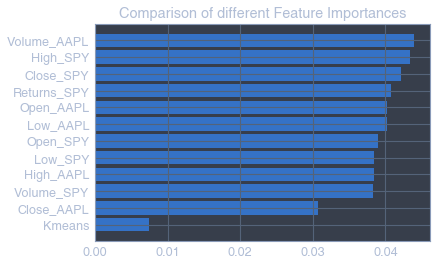

In [16]:
# Apply ExtraTreesClassifier class to extract features
store_importances = []
#--Repeat Classifier
for x in range(20):
    #--Build Model
    extra_tree_forest = ExtraTreesClassifier(criterion='entropy')
    #--Train model (Features, Target)
    extra_tree_forest.fit(df_coded.drop(columns=target_signal),
                          df_coded[target_signal])
    #--Computing & Normalizing the individual importances
    feat_importance = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_], \
                                         axis=0)
    #--Store results
    store_importances.append(feat_importance)
#--Plot graph of feature importances for better visualization
feat_importances = pd.Series(
    pd.DataFrame(store_importances).mean())
feat_importances.index = df_coded.drop(columns=target_signal).columns
print('feat_importances', '\n')
plt.barh(feat_importances.sort_values().index,
         feat_importances.sort_values().values)
plt.title('Comparison of different Feature Importances')
plt.show()

### Correlation HeatMap

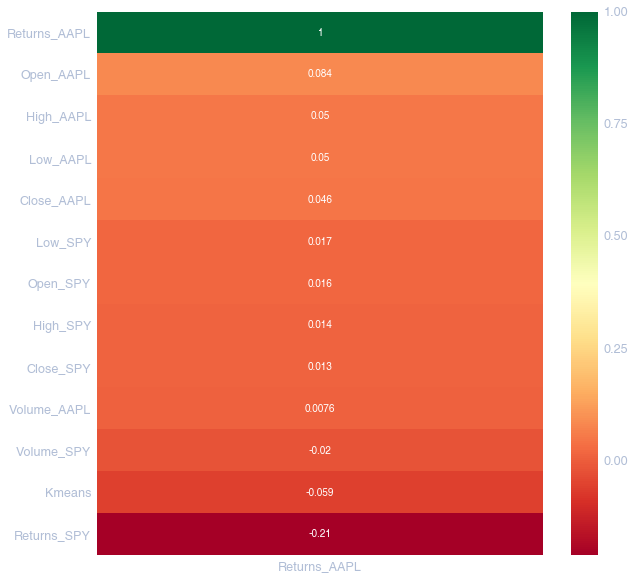

In [17]:
# Get correlations of each features in dataset
corrmat = df_concat.corr()
top_corr_features = corrmat.index
# Plot heat map
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat[target_signal].sort_values(by=target_signal, ascending=False), annot=True, cmap="RdYlGn")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Post Selection Manipulation

In [18]:
# Shift Data
#--Target Data
df_target = df_concat[target_signal]
print('Target Data ', len(df_target), '\n',
      tabulate(df_target.head(), headers='keys'))
print('\n')
#--Features Data
features = [
    'Volume_SPY', 'Returns_SPY', 'Volume_AAPL', 'Close_AAPL', 'High_AAPL'
]
df_features = df_concat[features]
print('Features Data ', len(df_features), '\n',
      tabulate(df_features.head(), headers='keys'))

Target Data  663 
 Date                   Returns_AAPL
-------------------  --------------
2018-01-04 00:00:00     0.004627
2018-01-05 00:00:00     0.0113265
2018-01-08 00:00:00    -0.00374143
2018-01-09 00:00:00    -0.000119005
2018-01-10 00:00:00    -0.000238053


Features Data  663 
 Date                   Volume_SPY    Returns_SPY    Volume_AAPL    Close_AAPL    High_AAPL
-------------------  ------------  -------------  -------------  ------------  -----------
2018-01-04 00:00:00   9.00704e+07     0.00630279    2.95179e+07        166.03       174.55
2018-01-05 00:00:00   8.06364e+07     0.0041799     2.24346e+07        166.8        173.47
2018-01-08 00:00:00   8.3524e+07      0.00665938    2.366e+07          168.7        175.37
2018-01-09 00:00:00   5.73192e+07     0.00183986    2.05678e+07        168.07       175.61
2018-01-10 00:00:00   5.7254e+07      0.00225686    2.1584e+07         168.05       175.06


In [19]:
# Convert to Numpy Arrays
#--Features Data
x_data = df_features.values
print('Features Data to array ', type(x_data), x_data.shape)
#--Target Data
y_data = df_target[['Returns_AAPL']].values
print('Target Data to array ', type(y_data), y_data.shape)

Features Data to array  <class 'numpy.ndarray'> (663, 5)
Target Data to array  <class 'numpy.ndarray'> (663, 1)


In [20]:
# Number of observations in the dataset
num_data = len(x_data)
print('Number of observation in the dataset: ', num_data, 'data-points')

Number of observation in the dataset:  663 data-points


In [21]:
# Train-test split
train_split = 0.8
num_train = int(train_split * num_data)
print('Number of observations in the training set: ', num_train, 'data-points')
num_test = num_data - num_train
print('Number of observations in the testing set: ', num_test, 'data-points')
#--Split data
#---Features Data
num_x_signals = x_data.shape[1]
print('Total Features: ', num_x_signals, 'features')
x_train = x_data[:num_train]
x_test = x_data[num_train:]
if len(x_train) + len(x_test) == num_data:
    print('Features Data Split Done')
    pass
#---Target Data
num_y_signals = y_data.shape[1]
print('Total Target: ', num_y_signals, 'target')
y_train = y_data[:num_train]
y_test = y_data[num_train:]
if len(y_train) + len(y_test) == num_data:
    print('Target Data Split Done')
    pass

Number of observations in the training set:  530 data-points
Number of observations in the testing set:  133 data-points
Total Features:  5 features
Features Data Split Done
Total Target:  1 target
Target Data Split Done


# Scale Data

In [22]:
# Dataset min. & max. values
print('Max value ', round(np.max(x_data), 2))
print('Min value ', round(np.min(x_data), 2))

Max value  392220700.0
Min value  -0.12


In [23]:
# Scaler for input data
x_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(x_train)
x_test_scaled = x_scaler.fit_transform(x_test)

In [24]:
# Scaler for output data
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.fit_transform(y_test)

In [25]:
# Array shapes of input and output data
print('Input shape ', x_train_scaled.shape)
print('Output shape ', y_train_scaled.shape)

Input shape  (530, 5)
Output shape  (530, 1)


# Data Generator

Instead of training the Recurrent Neural Network on the complete sequences of almost 300k observations, we will use the following function to create a batch of shorter sub-sequences picked at random from the training-data.

In [26]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [27]:
# Generate Data
batch_size = 200
sequence_length = 200
generator = batch_generator(batch_size=batch_size, sequence_length=sequence_length)
x_batch, y_batch = next(generator)
print('Input Data shape: ', x_batch.shape)
print('Output Data shape: ', y_batch.shape)
print('There are ', batch_size, ' sequences & each has ', sequence_length, ' observations with ',
      num_x_signals, ' inputs and ', num_y_signals, ' outputs')

Input Data shape:  (200, 200, 5)
Output Data shape:  (200, 200, 1)
There are  200  sequences & each has  200  observations with  5  inputs and  1  outputs


# Validation Set

In [28]:
# Create a Validation Data
validation_data = (np.expand_dims(x_test_scaled,
                                  axis=0), np.expand_dims(y_test_scaled,
                                                          axis=0))

# Create LSTM

In [29]:
# Create Model
model = Sequential()

In [30]:
# LSTM Layer
model.add(LSTM(216, return_sequences=True, input_shape=(
    None,
    num_x_signals,
)))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [31]:
# Dense Layer
model.add((Dense(num_y_signals, activation='exponential')))

# Loss Function

In [32]:
# Define warmup step for training model
warmup_steps = 50

In [33]:
# Loss Function
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculat the Mean Squared Error and use it as loss.
    mse = mean(square(y_true_slice - y_pred_slice))
    
    return mse

# Compile Model

This is the optimizer and the beginning learning-rate that we will use.

In [34]:
optimizer = RMSprop(lr=1e-3)

We then compile the Keras model so it is ready for training.

In [35]:
model.compile(loss=loss_mse_warmup, optimizer=optimizer)

This is a very small model with only two layers. The output shape of (None, None, 1) means that the model will output a batch with an arbitrary number of sequences, each of which has an arbitrary number of observations, and each observation has 1 signals. This corresponds to the 1 target signals we want to predict.

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 216)         191808    
_________________________________________________________________
dense (Dense)                (None, None, 1)           217       
Total params: 192,025
Trainable params: 192,025
Non-trainable params: 0
_________________________________________________________________


# Callback Functions

During training we want to save checkpoints and log the progress to TensorBoard so we create the appropriate callbacks for Keras.

This is the callback for writing checkpoints during training.

In [37]:
path_checkpoint = 'LSTM_Model.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

This is the callback for stopping the optimization when performance worsens on the validation-set

In [38]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)


This is the callback for writing the TensorBoard log during training.

In [39]:
callback_tensorboard = TensorBoard(log_dir='.\\23_logs\\',
                                   histogram_freq=0,
                                   write_graph=False)

This callback reduces the learning-rate for the optimizer if the validation-loss has not improved since the last epoch (as indicated by patience=0). The learning-rate will be reduced by multiplying it with the given factor. We set a start learning-rate of 1e-3 above, so multiplying it by 0.1 gives a learning-rate of 1e-4. We don't want the learning-rate to go any lower than this.

In [40]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [41]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

# Train the Long Short Term Memory Model

We can now train the neural network.

Note that a single "epoch" does not correspond to a single processing of the training-set, because of how the batch-generator randomly selects sub-sequences from the training-set. Instead we have selected steps_per_epoch so that one "epoch" is processed in a few minutes.

With these settings, each "epoch" took about 2.5 minutes to process on a GTX 1070. After 14 "epochs" the optimization was stopped because the validation-loss had not decreased for 5 "epochs". This optimization took about 35 minutes to finish.

Also note that the loss sometimes becomes NaN (not-a-number). This is often resolved by restarting and running the Notebook again. But it may also be caused by your neural network architecture, learning-rate, batch-size, sequence-length, etc. in which case you may have to modify those settings.

In [42]:
model.fit(x=generator,
          epochs=10,
          steps_per_epoch=100,
          validation_data=validation_data,
          callbacks=callbacks)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
 99/100 [============================>.] - ETA: 3s - loss: 0.0146
Epoch 00001: val_loss improved from inf to 0.00733, saving model to LSTM_Model.keras
100/100 [==============================] - 339s 3s/step - loss: 0.0146 - val_loss: 0.0073
Epoch 2/10
 99/100 [============================>.] - ETA: 3s - loss: 0.0114
Epoch 00002: val_loss did not improve from 0.00733

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
100/100 [==============================] - 379s 4s/step - loss: 0.0114 - val_loss: 0.0080
Epoch 3/10
 99/100 [============================>.] - ETA: 4s - loss: 0.0104
Epoch 00003: val_loss improved from 0.00733 to 0.00691, saving model to LSTM_Model.keras
100/100 [==============================] - 411s 4s/step - loss: 0.0104 - val_loss: 0.0069
Epoch 4/10
 99/100 [============================>.] - ETA: 4s - loss: 0.0099
Epoch 00004: val_loss

# Load Checkpoint

In [42]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

# Performance on Test-Set

We can now evaluate the model's performance on the test-set. This function expects a batch of data, but we will just use one long time-series for the test-set, so we just expand the array-dimensionality to create a batch with that one sequence

In [43]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 0s 197ms/sample - loss: 0.0069


In [44]:
print("loss (test-set):", result)

loss (test-set): 0.006907920353114605


In [45]:
# If you have several metrics you can use this instead.
if False:
    for res, metric in zip(result, model.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))

# Generate Predictions

This helper-function plots the predicted and true output-signals.

In [46]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    # End-index for the sequences.
    end_idx = start_idx + length
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)
    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    # For each output-signal.
    for signal in range(len(target_signal)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]
        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15, 5))
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        # Plot labels etc.
        plt.ylabel(target_signal[signal])
        plt.legend()
        plt.show()
        return y_true, y_pred_rescaled

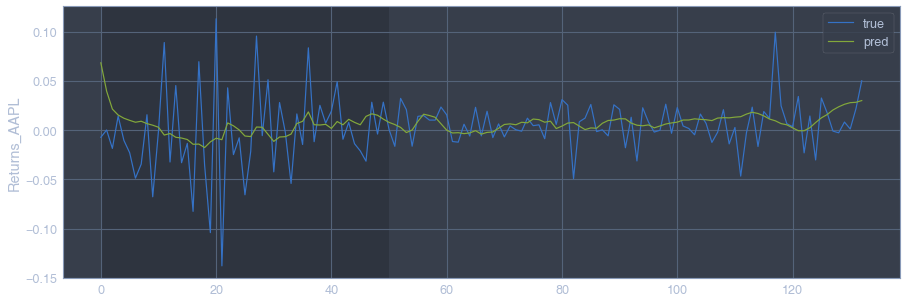

In [47]:
true, prediction = plot_comparison(start_idx=0, length=num_train, train=False)

In [48]:
# Transfer to DataFrame
df_result = pd.DataFrame([true[:, 0], prediction[:, 0]], index=['True', 'Predictions']).T
df_result['Difference'] = np.abs(df_result['True']-df_result['Predictions'])

In [49]:
# Result summary
print(tabulate(df_result.describe(), headers='keys'))

               True    Predictions     Difference
-----  ------------  -------------  -------------
count  133            133           133
mean     0.00318411     0.00675604    0.0237012
std      0.0340481      0.0106284     0.024788
min     -0.137711      -0.0176203     0.000683065
25%     -0.0116641      0.00169691    0.0060428
50%      0.00362464     0.00671357    0.0171823
75%      0.0208411      0.0113399     0.029259
max      0.113173       0.0684491     0.12809


In [50]:
mean = np.mean(prediction, axis=0).reshape(-1)
std = np.std(prediction, axis=0).reshape(-1)
lower = np.percentile(prediction, 5, axis=0).reshape(-1)
upper = np.percentile(prediction, 95, axis=0).reshape(-1)

In [51]:
# Metrics
rmse = np.round(np.sqrt(mean_squared_error(df_result['True'], df_result['Predictions'])), 4)
print('Root Mean Squared Error: ', rmse)
r2 = np.round(r2_score(df_result['True'], df_result['Predictions'])*100, 2)
print('R2 Score: ', r2)

Root Mean Squared Error:  0.0342
R2 Score:  -1.83


In [52]:
# Convert to Price
price_pred = []
for i in range(num_test):
    price = np.exp(
        df_result['Predictions'][i]) * df['Close_AAPL'].iloc[-(num_test + 1 - i)]
    price_pred.append(price)
df_result.index = df['Close_AAPL'].iloc[-(num_test):].index
df_result['Price_True'] = df['Close_AAPL'].iloc[-(num_test):].values
df_result['Price_Predictions'] = price_pred
df_result['Price_Diff'] = np.abs(df_result['Price_True'] - df_result['Price_Predictions'])
print('df_result', '\n')
print(tabulate(df_result.describe(), headers='keys'))

df_result 

               True    Predictions     Difference    Price_True    Price_Predictions    Price_Diff
-----  ------------  -------------  -------------  ------------  -------------------  ------------
count  133            133           133                 133                 133         133
mean     0.00318411     0.00675604    0.0237012         329.156             330.378       7.41742
std      0.0340481      0.0106284     0.024788           63.006              63.3939      7.19682
min     -0.137711      -0.0176203     0.000683065       223.36              224.085       0.262255
25%     -0.0116641      0.00169691    0.0060428         281.9               283.52        2.08745
50%      0.00362464     0.00671357    0.0171823         317.57              319.762       5.43633
75%      0.0208411      0.0113399     0.029259          370.71              375.076       9.95406
max      0.113173       0.0684491     0.12809           497.48              487.553      36.5148


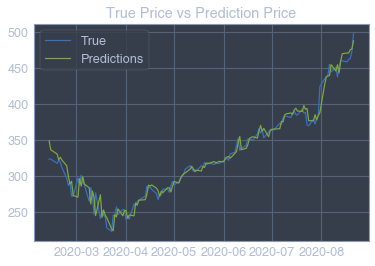

In [53]:
# Plot Price Prediction on Test Data
plt.plot(df_result['Price_True'], label='True')
plt.plot(df_result['Price_Predictions'], label='Predictions')
plt.title('True Price vs Prediction Price')
plt.legend()
plt.show()

In [54]:
# Price Predictions Metric
rmse = np.round(np.sqrt(mean_squared_error(df_result['Price_True'], df_result['Price_Predictions'])), 4)
print('Root Mean Squared Error: ', rmse)
r2 = np.round(r2_score(df_result['Price_True'], df_result['Price_Predictions'])*100, 2)
print('R2 Score: ', r2)

Root Mean Squared Error:  10.3161
R2 Score:  97.3


# Predict Future

Predict Future

## Data Manipulation

In [55]:
# Data Manipulation for future prediction
#--Get shifted Data
shifted_data = pd.DataFrame(df.iloc[-1, :][features]).T# Since all features are shifted data so there is need to further process this
#--Fix Future Dating
for x in range(1, 10):
    # Add days to the last day
    _ = df_features.index[-1] + timedelta(days=x)
    if _.weekday() < 5: # Repeat until it's working Monday-Friday
        break
shifted_data.index = [_] # Add as index
del _
#--Add future features
df_features_future = df_features.append(shifted_data)
print(tabulate(df_features_future.tail(), headers='keys'))

                       Volume_SPY    Returns_SPY    Volume_AAPL    Close_AAPL    High_AAPL
-------------------  ------------  -------------  -------------  ------------  -----------
2020-08-18 00:00:00   3.5481e+07      0.00317155    2.98904e+07        458.43       464.35
2020-08-19 00:00:00   3.87339e+07     0.00215801    2.64084e+07        462.25       464
2020-08-20 00:00:00   6.80542e+07    -0.00417241    3.63845e+07        462.83       468.65
2020-08-21 00:00:00   4.22078e+07     0.00310876    3.17268e+07        473.1        473.57
2020-08-24 00:00:00   5.51066e+07     0.00354108    8.45137e+07        497.48       499.47


## Prediction

In [56]:
def predict_future(df_futures_feature=df_features_future,
                   start_idx=0,
                   length=100):
    x_test_scaled = x_scaler.transform(
        df_features_future.iloc[-(num_test + 1):, :])
    x = x_test_scaled
    y_true = y_test
    # End-index for the sequences.
    end_idx = start_idx + length
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)
    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    # For each output-signal.
    for signal in range(len(target_signal)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]
        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15, 5))
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        # Plot labels etc.
        plt.ylabel(target_signal[signal])
        plt.legend()
        plt.show()
        return y_true, y_pred_rescaled

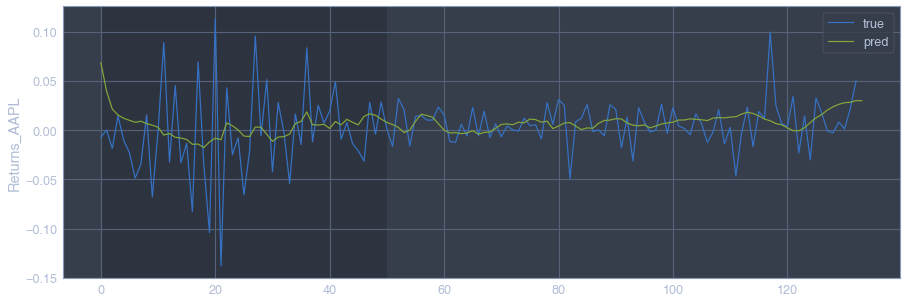

In [57]:
# Prediction
true_future, predict_future = predict_future(df_futures_feature=df_features_future, start_idx=0, length=1000)

In [58]:
# Compile Results
df_result_future = pd.DataFrame([true_future[:, 0], predict_future[:, 0]],
                                index=['True', 'Predictions']).T
#--Convert to Price
price_pred = []
for i in range(num_test + 1):
    price = np.exp(df_result_future['Predictions']
                   [i]) * df['Close_AAPL'].iloc[-(num_test + 1 - i)]
    price_pred.append(price)
df_result_future.index = df_features_future.iloc[-(num_test + 1):, :].index
df_result_future['Price_True'] = np.append(
    df['Close_AAPL'].iloc[-(num_test):].values, 0)
df_result_future['Price_Predictions'] = price_pred
df_result_future['Price_Diff'] = np.abs(df_result_future['Price_True'] -
                                        df_result_future['Price_Predictions'])
df_result_future.fillna(0, inplace=True)
print('df_result_future', '\n')
print(tabulate(df_result_future.iloc[:-1, :].describe(), headers='keys'))

df_result_future 

               True    Predictions    Price_True    Price_Predictions    Price_Diff
-----  ------------  -------------  ------------  -------------------  ------------
count  133            133                133                 133         133
mean     0.00318411     0.00675604       329.156             330.378       7.41742
std      0.0340481      0.0106284         63.006              63.3939      7.19682
min     -0.137711      -0.0176203        223.36              224.085       0.262255
25%     -0.0116641      0.00169691       281.9               283.52        2.08745
50%      0.00362464     0.00671357       317.57              319.762       5.43633
75%      0.0208411      0.0113399        370.71              375.076       9.95406
max      0.113173       0.0684491        497.48              487.553      36.5148


In [73]:
# Compile Results
df_result_future = pd.DataFrame([true_future[:, 0], predict_future[:, 0]],
                                index=['True', 'Predictions']).T
#--Convert to Price
price_pred = []
for i in range(num_test + 1):
    price = np.exp(df_result_future['Predictions']
                   [i]) * df['Close_AAPL'].iloc[-(num_test + 1 - i)]
    price_pred.append(price)
df_result_future.index = df_features_future.iloc[-(num_test + 1):, :].index
df_result_future['Price_True'] = np.append(
    df['Close_AAPL'].iloc[-(num_test):].values, 0)
df_result_future['Price_Predictions'] = price_pred
_list = []
for x in np.arange(0.9, 0.9900, step=0.0001):
    _ = df_result_future['Price_Predictions'] * x
    _diff = df_result_future['Price_True'] - _
    _list.append((x, _diff[:-1].mean()))
_ = pd.DataFrame(_list)
constant = _[0][_[1] == min(abs(x) for x in _[1])].values
# constant = np.min(_[(_[1] > -0.009) & (_[1] < 0.009)])[0]
df_result_future['Price_Predictions'] = df_result_future['Price_Predictions'] * constant
df_result_future['Price_Diff'] = (df_result_future['Price_True'] -
                                  df_result_future['Price_Predictions'])
df_result_future.fillna(0, inplace=True)
print('df_result_future', '\n')
print(tabulate(df_result_future.iloc[:-1, :].describe(), headers='keys'))

df_result_future 

               True    Predictions    Price_True    Price_Predictions    Price_Diff
-----  ------------  -------------  ------------  -------------------  ------------
count  133            133                133                 133          133
mean     0.00318411     0.00675604       329.156             327.041        2.11532
std      0.0340481      0.0106284         63.006              62.7536      10.2261
min     -0.137711      -0.0176203        223.36              221.822      -30.1823
25%     -0.0116641      0.00169691       281.9               280.657       -3.25313
50%      0.00362464     0.00671357       317.57              316.532        1.99331
75%      0.0208411      0.0113399        370.71              371.288        7.38671
max      0.113173       0.0684491        497.48              482.629       40.4312


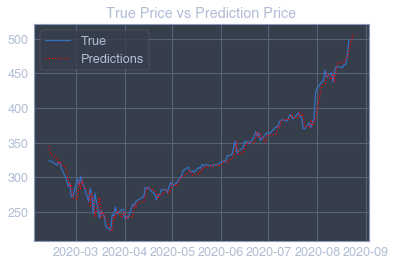

In [74]:
# Plot Price Prediction 
plt.plot(df_result_future['Price_True'].iloc[:-1,], label='True', alpha=1)
plt.plot(df_result_future['Price_Predictions'], label='Predictions', alpha=3, ls=":", color='red')
plt.title('True Price vs Prediction Price')
plt.legend()
plt.show()

In [75]:
# Statement
print('One Step Ahead result is', df_result_future['Price_Predictions'][-1])

One Step Ahead result is 507.42498510451236


In [76]:
df_result_future

,True,Predictions,Price_True,Price_Predictions,Price_Diff
2020-02-13,-0.007148,0.068449,323.41,345.283741,-21.873741
2020-02-14,0.000247,0.039717,323.49,333.114491,-9.624491
2020-02-18,-0.018470,0.021468,317.57,327.171632,-9.601632
2020-02-19,0.014381,0.015423,322.17,319.248692,2.921308
2020-02-20,-0.010327,0.012165,318.86,322.819533,-3.959533
...,...,...,...,...,...
2020-08-18,0.008298,0.026343,462.25,465.913377,-3.663377
2020-08-19,0.001254,0.027981,462.83,470.565553,-7.735553
2020-08-20,0.021947,0.028351,473.10,471.330552,1.769448
2020-08-21,0.050249,0.030092,497.48,482.628782,14.851218


In [77]:
df_aapl.tail()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2020-08-18,457.41,464.00,456.03,462.25,462.25,26408400,0.0,0.0
2020-08-19,463.93,468.65,462.44,462.83,462.83,36384500,0.0,0.0
2020-08-20,463.00,473.57,462.93,473.10,473.10,31726800,0.0,0.0
2020-08-21,477.05,499.47,477.00,497.48,497.48,84513700,0.0,0.0
2020-08-24,514.79,515.14,495.75,503.43,503.43,86326400,0.0,0.0


### Try